In [1]:
# Install package for UCI repo
!pip install ucimlrepo

In [2]:
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
# 1. Fetch a dataset (e.g., Breast Cancer Wisconsin (diagnostic) dataset)
dataset = ucimlrepo.fetch_ucirepo(id=17)
# metadata
print("Metadata:")
print(dataset.metadata)
target = dataset.data.targets.columns.to_list()[0]

Metadata:
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None,

In [4]:
# Format data
X = pd.DataFrame(dataset.data.features, columns=dataset.feature_names)
y = pd.DataFrame(dataset.data.targets, columns=dataset.target_names)
data = pd.concat([X, y], axis=1)

In [5]:
# data info
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 1

In [6]:
# a. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064

Correlation Matrix:
                     radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.06

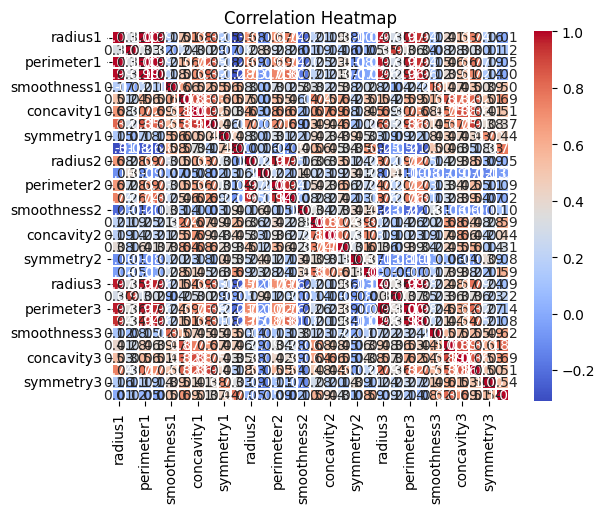

In [7]:
# b. Correlation Analysis
print("Correlation Matrix:")
numeric_data = pd.get_dummies(data, columns=[target], prefix=['1-hot'])  #prefix is used to add a prefix to the encoded column names
numeric_data = numeric_data.select_dtypes(include=[float, int])  # Select only numeric columns
corr_matrix = numeric_data.corr()
print(corr_matrix)
sns.heatmap(round(corr_matrix,2), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title("Correlation Heatmap")
plt.show()

Univariate Analysis:


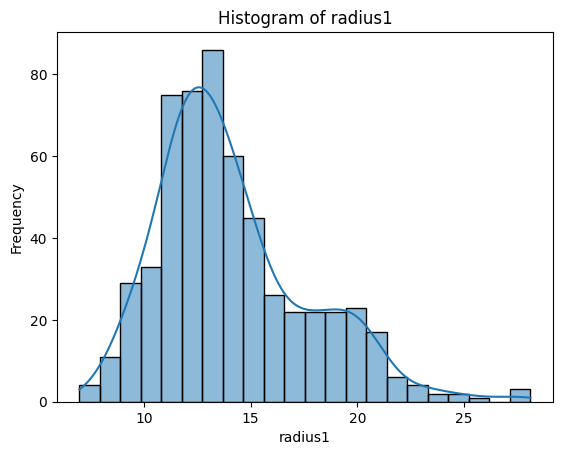

Skewness of radius1: 0.9398934455576345


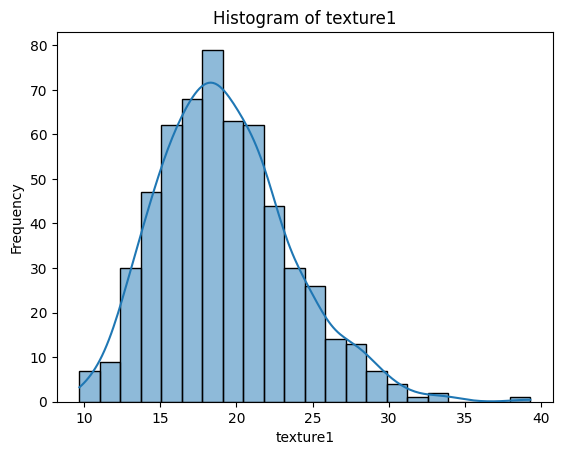

Skewness of texture1: 0.6487335672867015


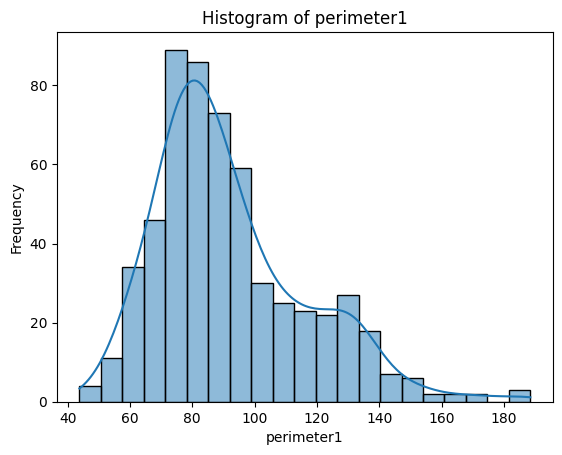

Skewness of perimeter1: 0.9880369541677213


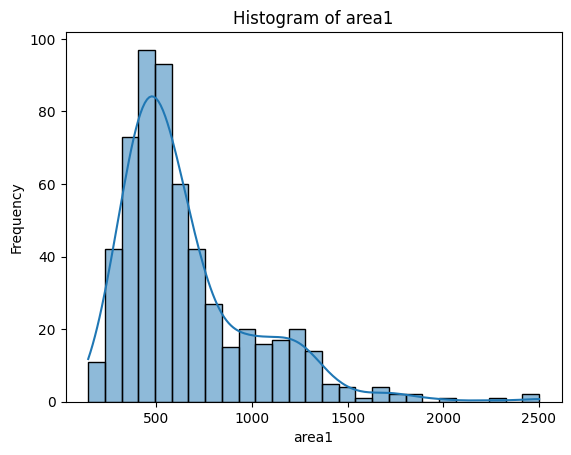

Skewness of area1: 1.6413905092044112


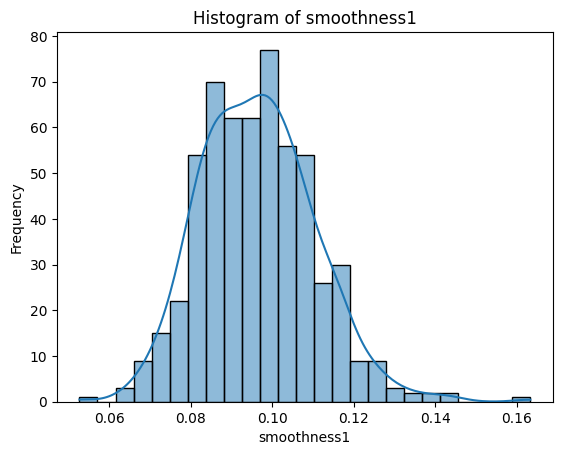

Skewness of smoothness1: 0.4551199203571718


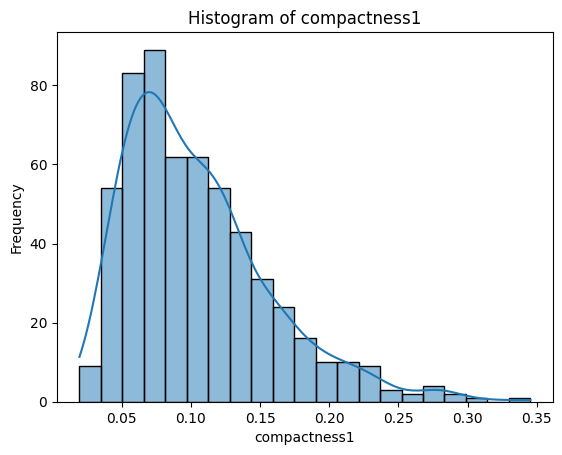

Skewness of compactness1: 1.186983323974523


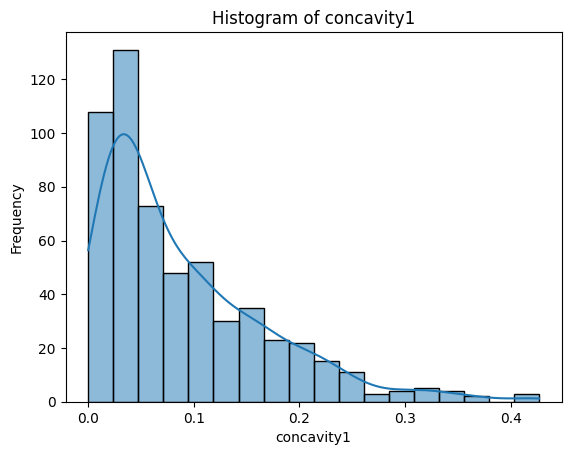

Skewness of concavity1: 1.3974832352826647


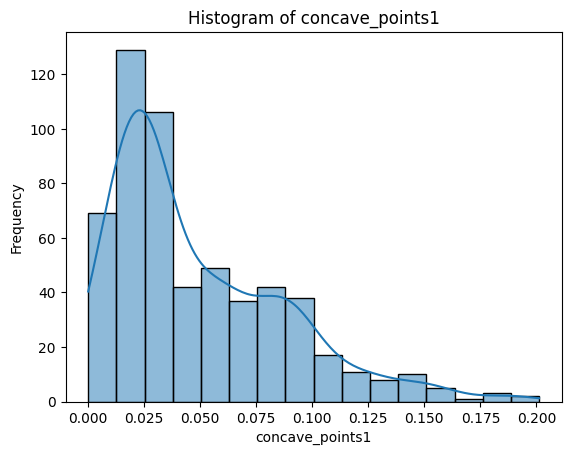

Skewness of concave_points1: 1.1680903481012583


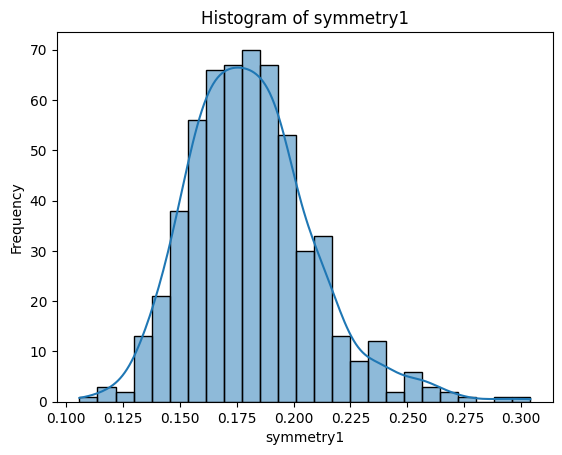

Skewness of symmetry1: 0.7236947177154984


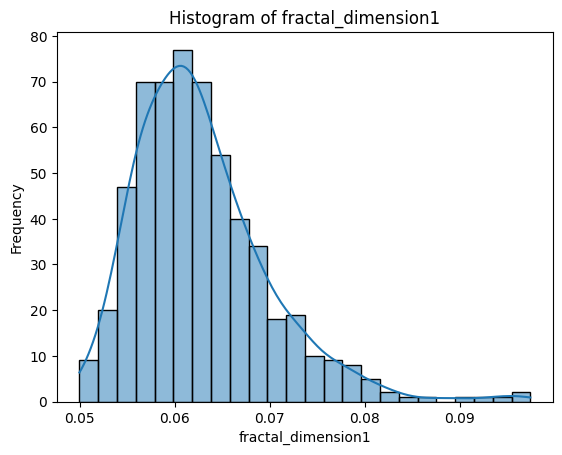

Skewness of fractal_dimension1: 1.3010473927890858


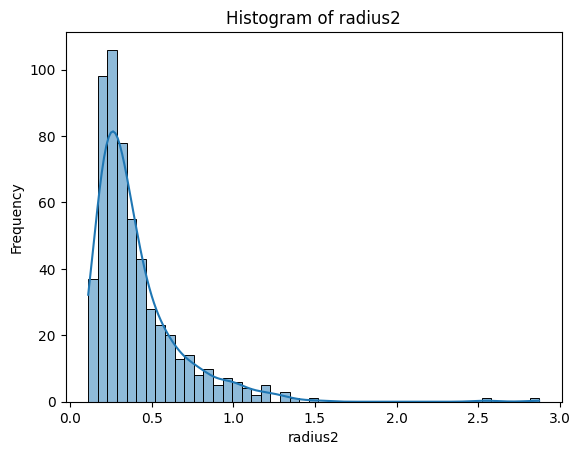

Skewness of radius2: 3.080463985335206


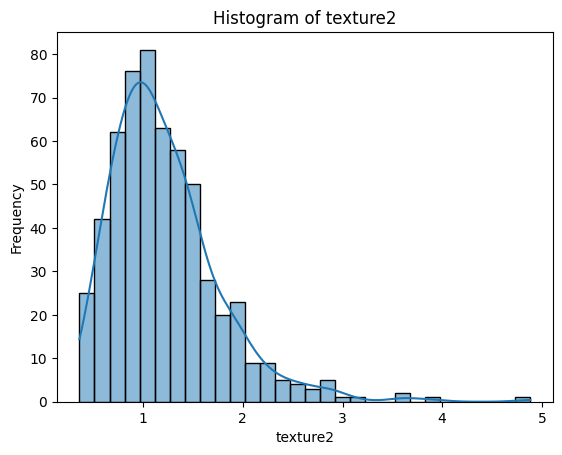

Skewness of texture2: 1.6421002649479612


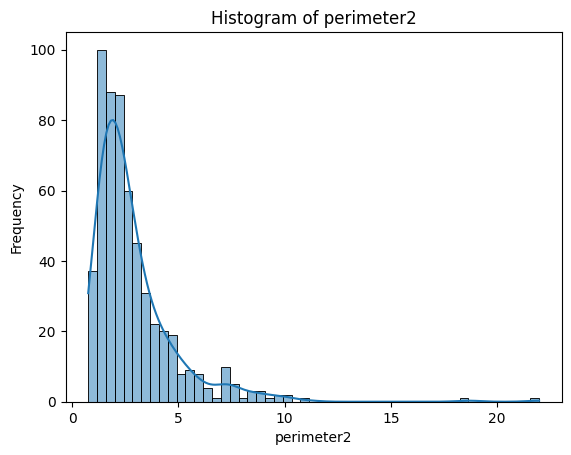

Skewness of perimeter2: 3.4345304746147067


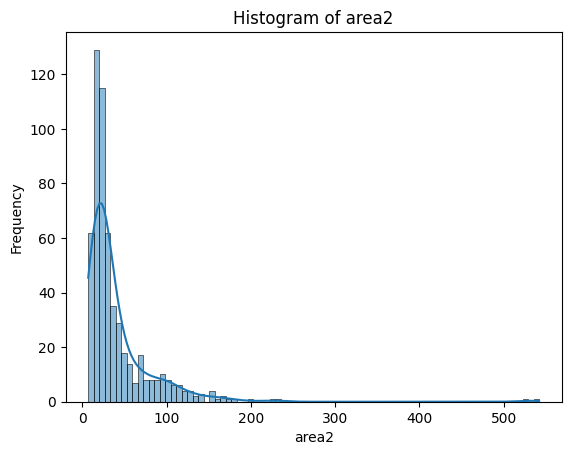

Skewness of area2: 5.432815862951913


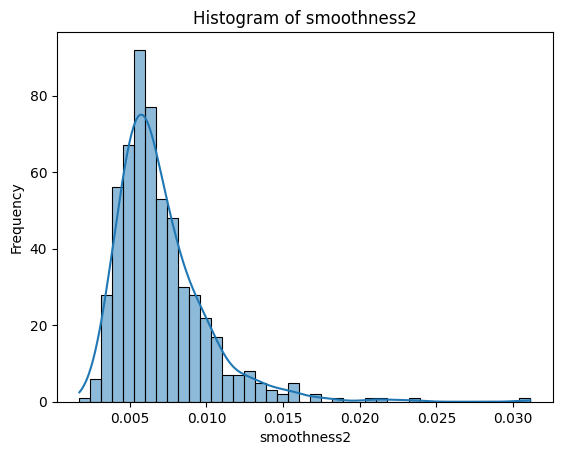

Skewness of smoothness2: 2.308344221045982


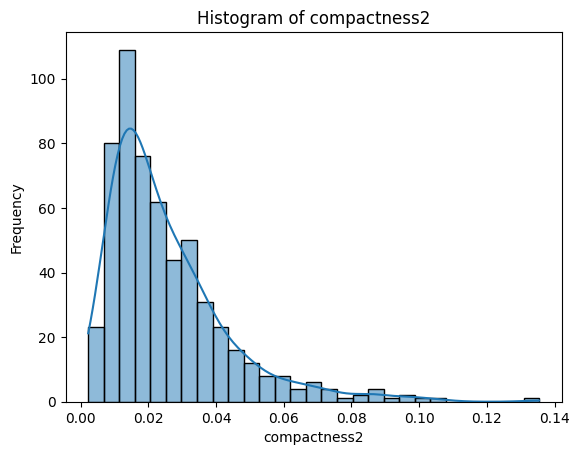

Skewness of compactness2: 1.8972023914083855


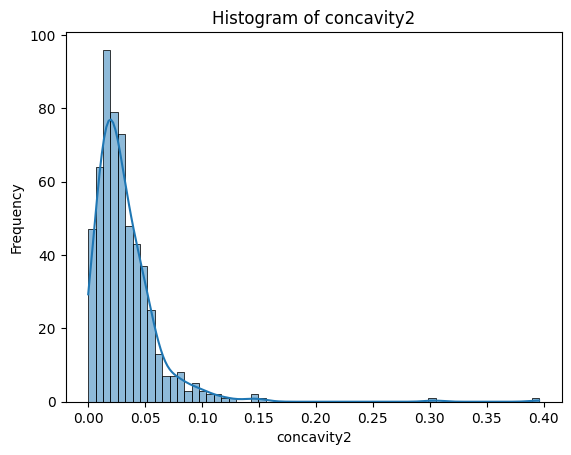

Skewness of concavity2: 5.096980949017036


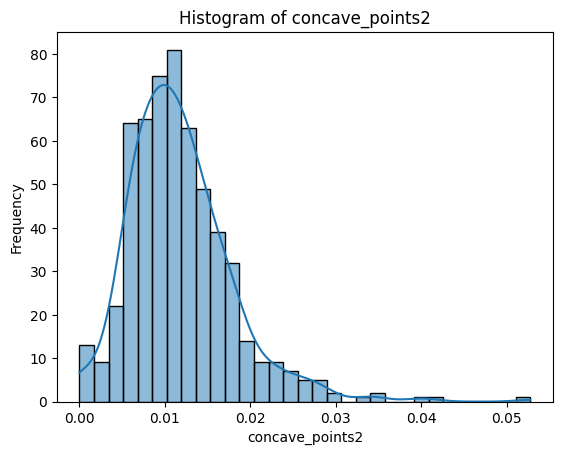

Skewness of concave_points2: 1.4408668862916998


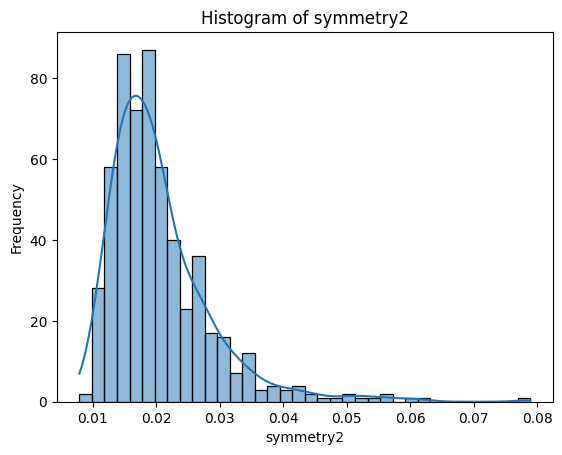

Skewness of symmetry2: 2.189341838925834


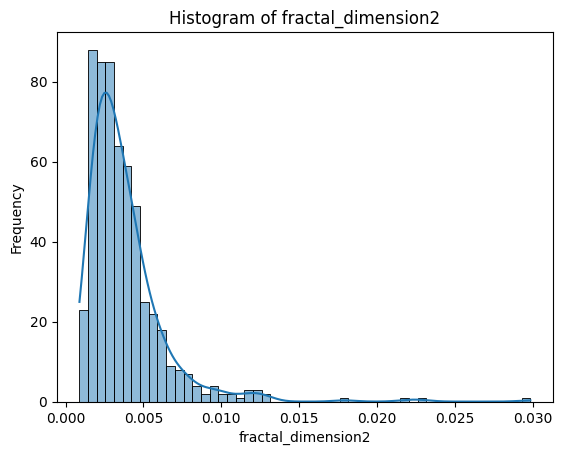

Skewness of fractal_dimension2: 3.913616654675261


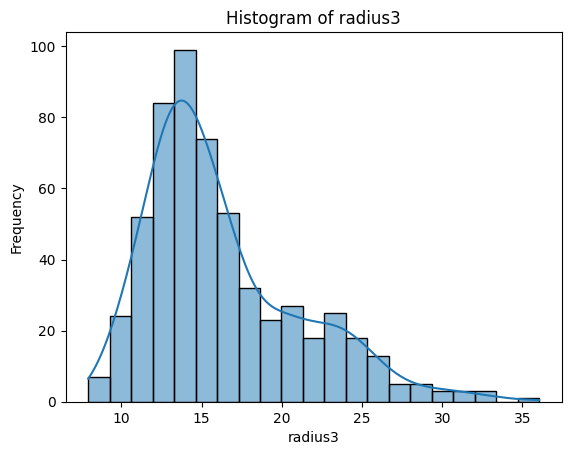

Skewness of radius3: 1.1002050372722139


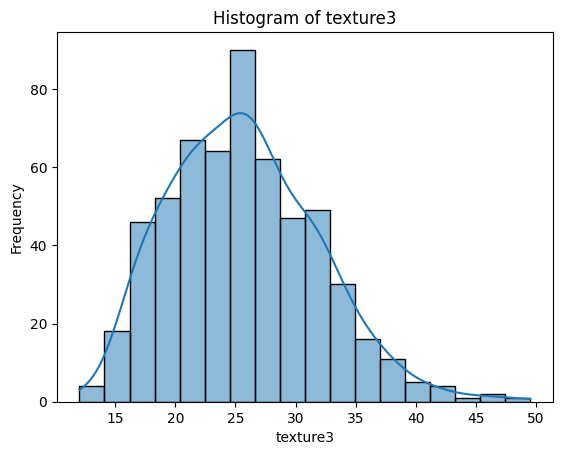

Skewness of texture3: 0.4970066697616781


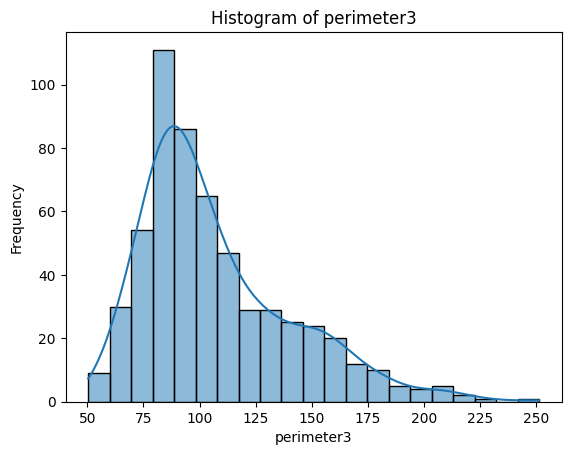

Skewness of perimeter3: 1.1251876208771259


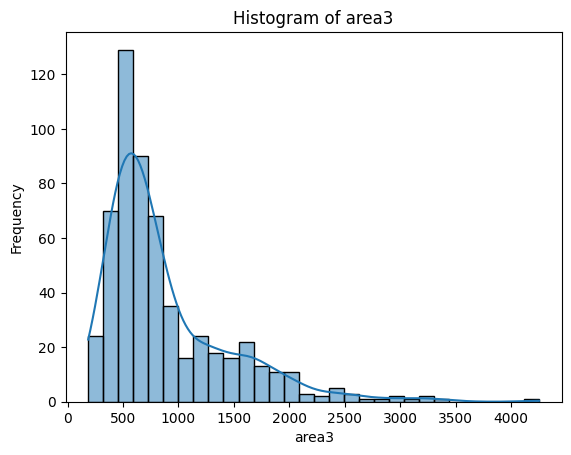

Skewness of area3: 1.8544679916096252


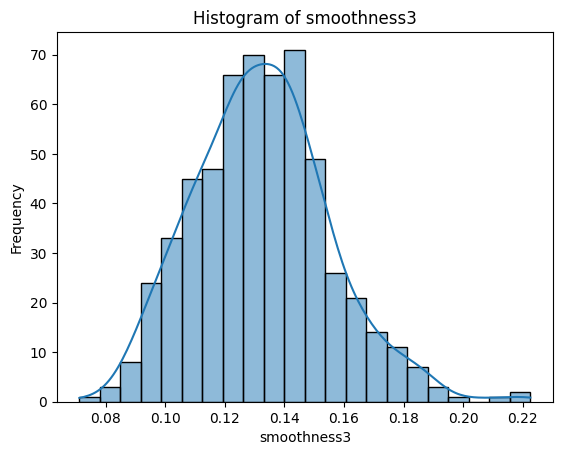

Skewness of smoothness3: 0.41433004572343024


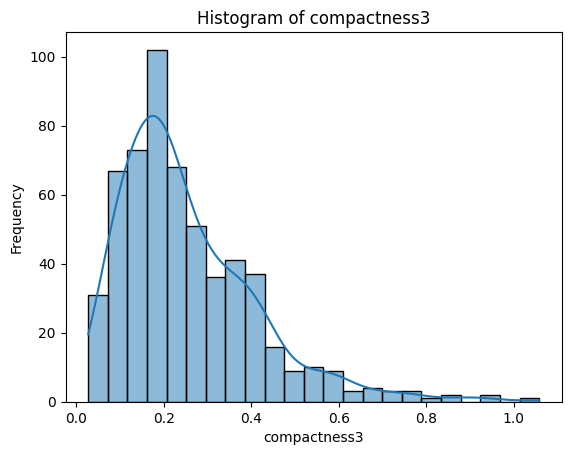

Skewness of compactness3: 1.4696674610957545


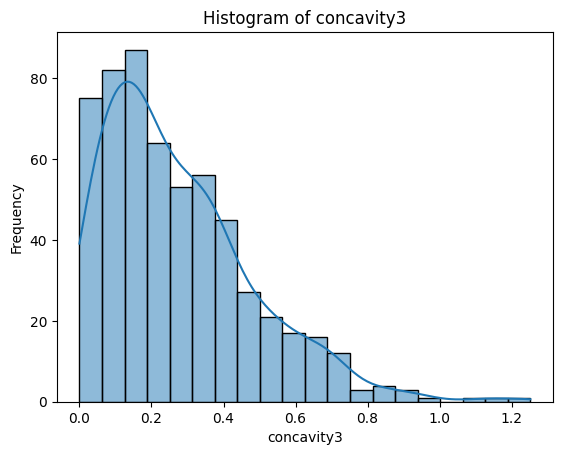

Skewness of concavity3: 1.147202339994203


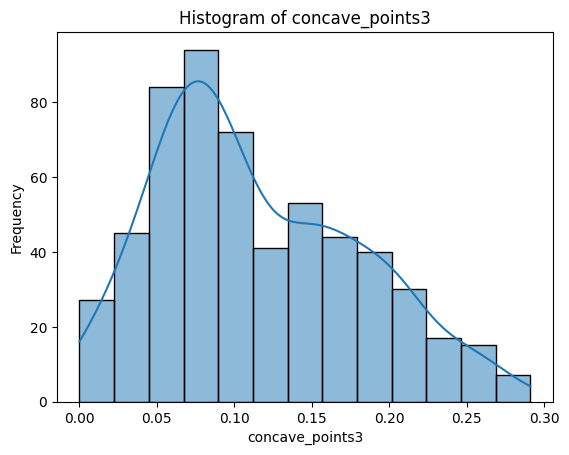

Skewness of concave_points3: 0.4913159397943974


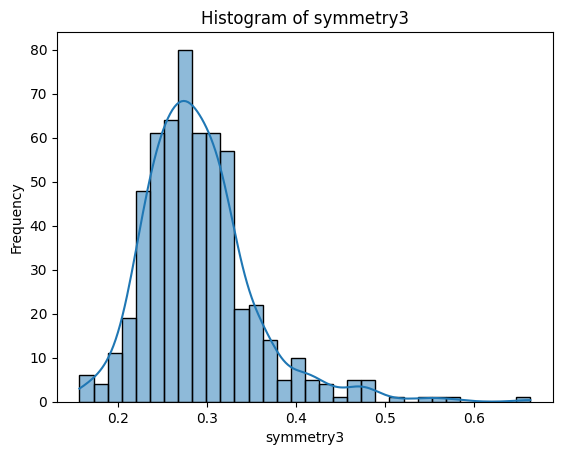

Skewness of symmetry3: 1.4301448677540645


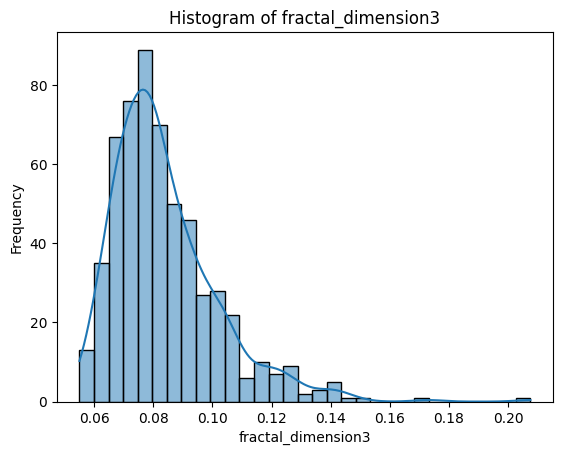

Skewness of fractal_dimension3: 1.658193155047751


In [8]:
# c. Univariate Analysis
print("Univariate Analysis:")
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):  # Only for numeric columns
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness of {column}: {skew(data[column])}")

Bivariate Analysis:


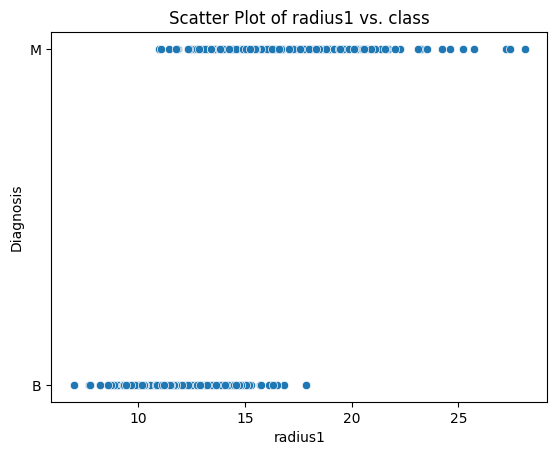

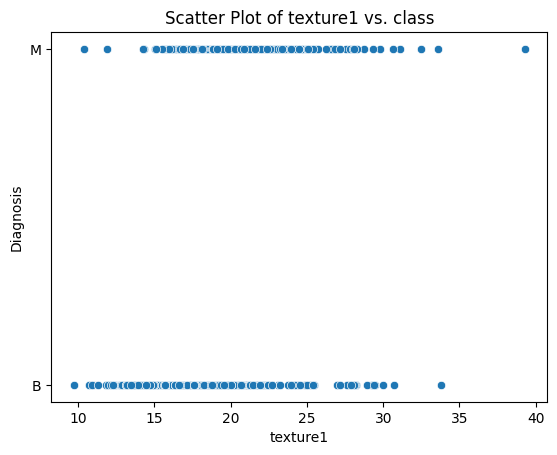

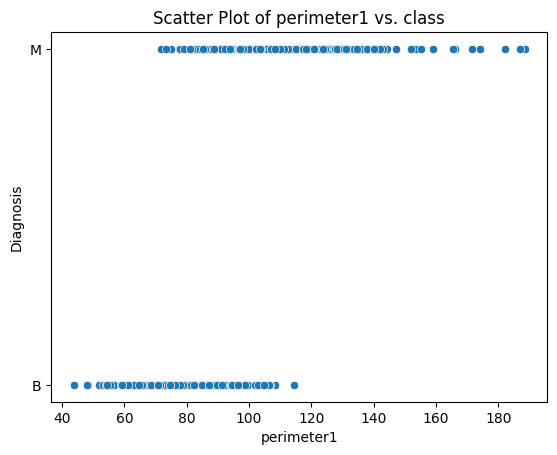

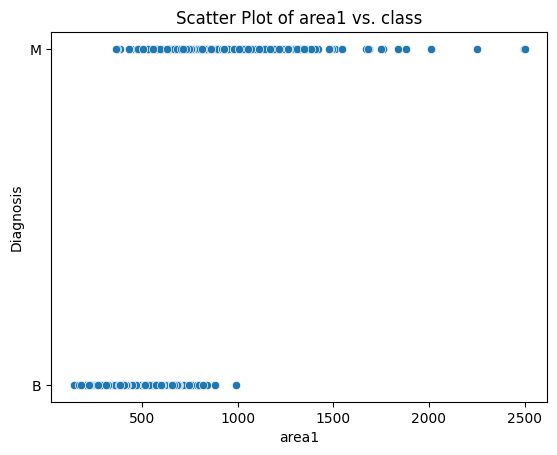

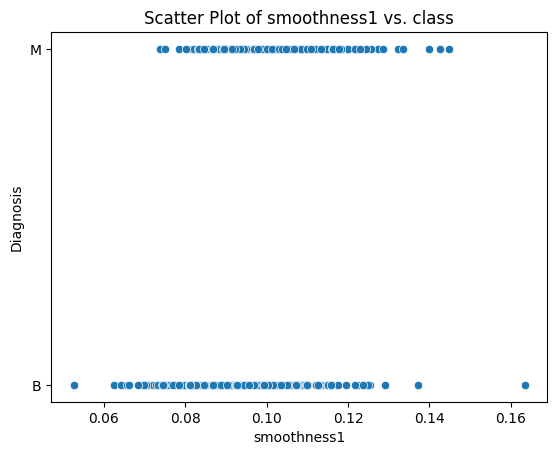

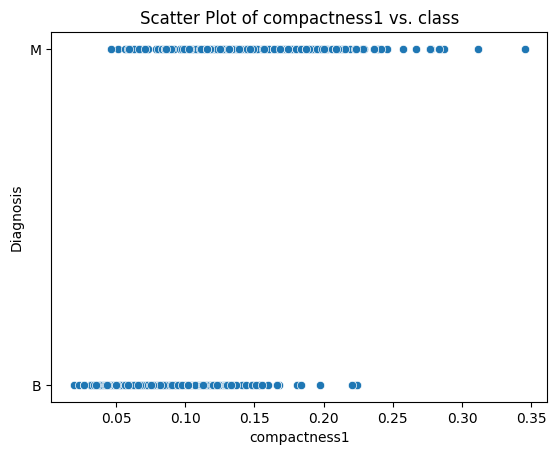

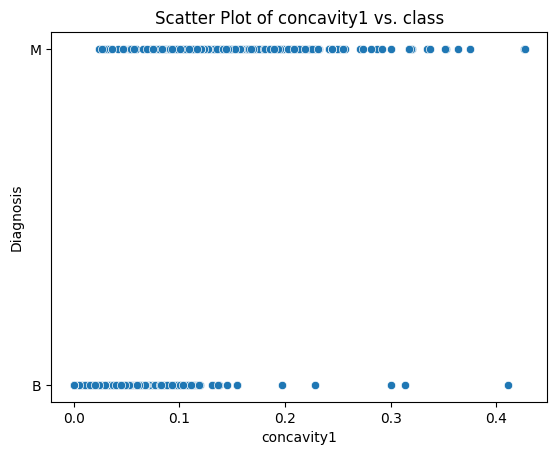

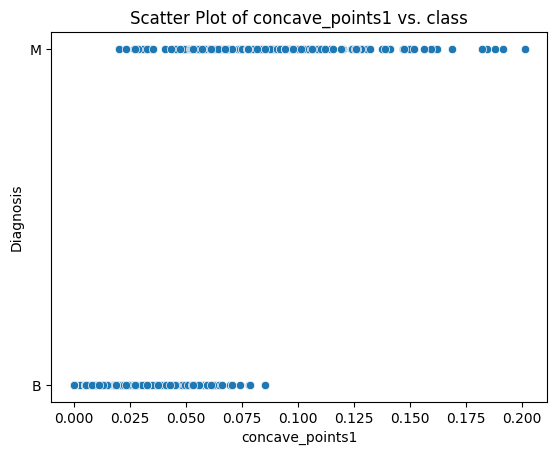

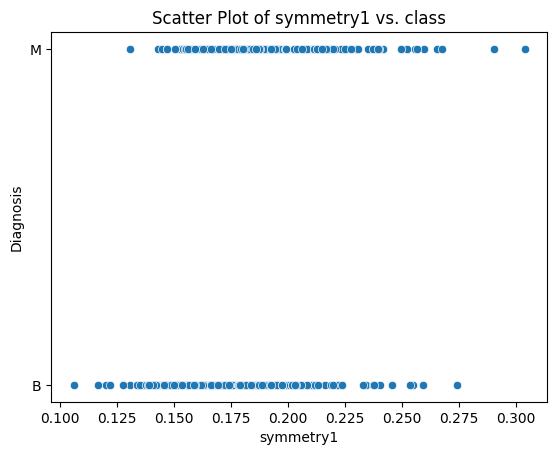

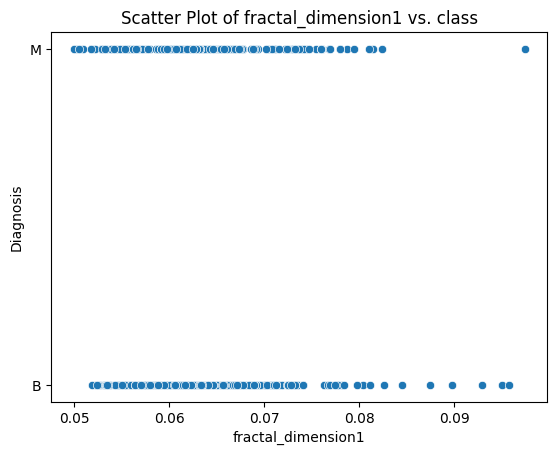

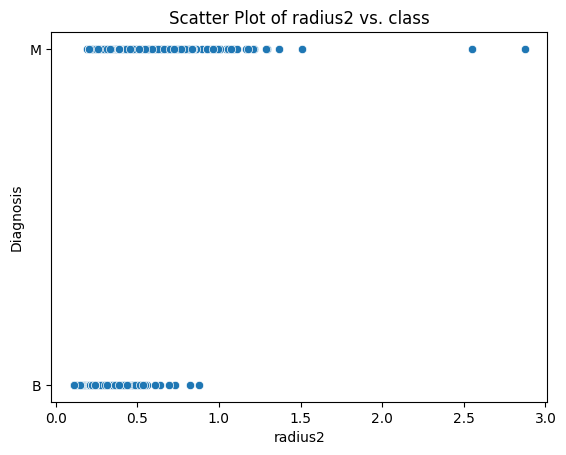

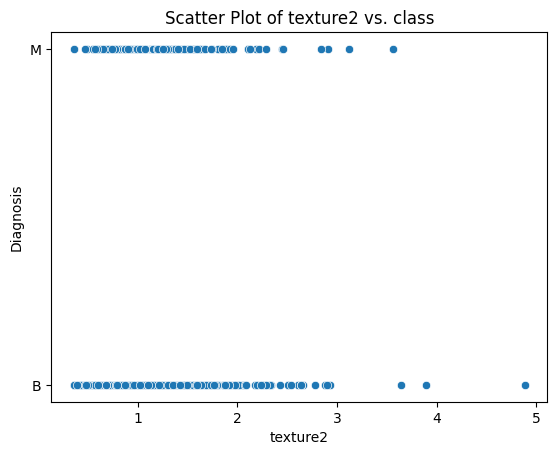

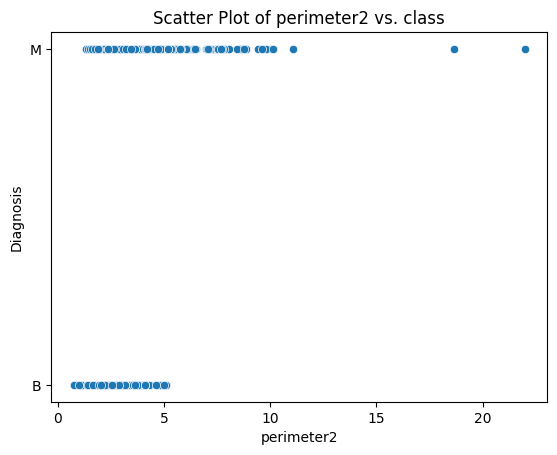

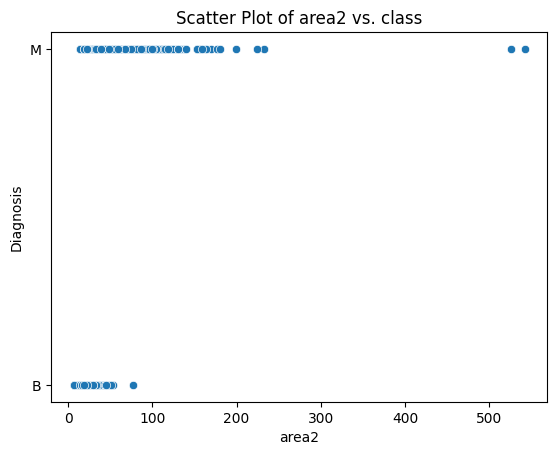

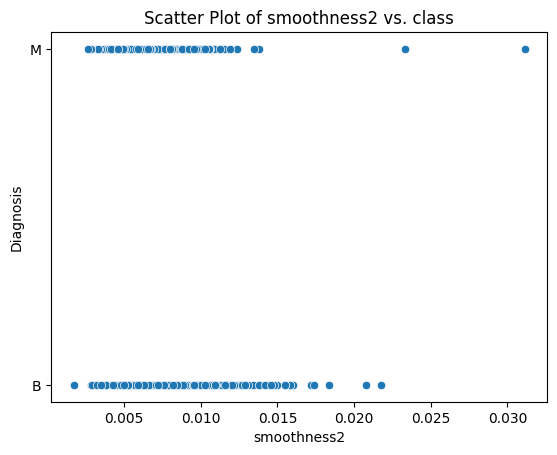

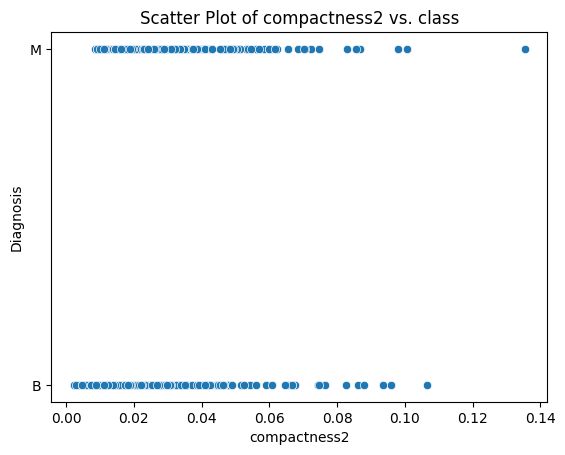

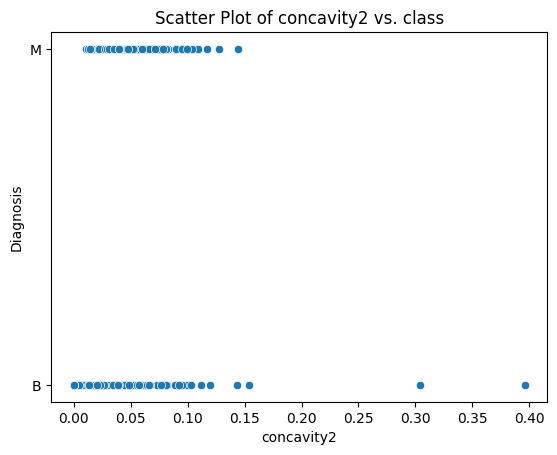

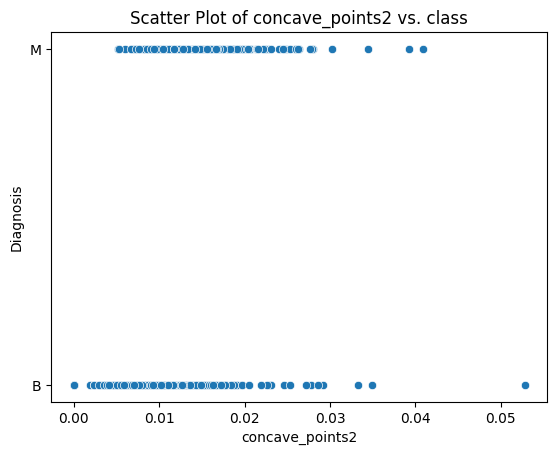

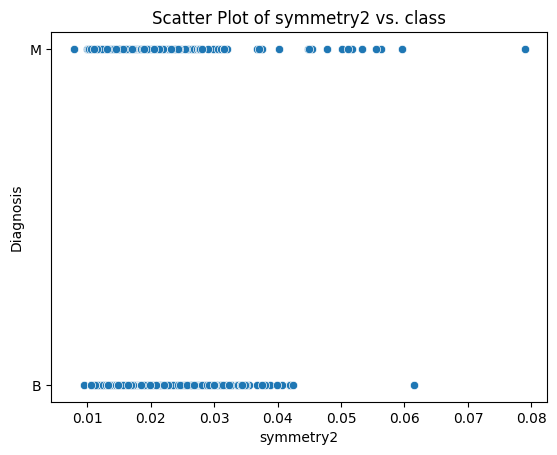

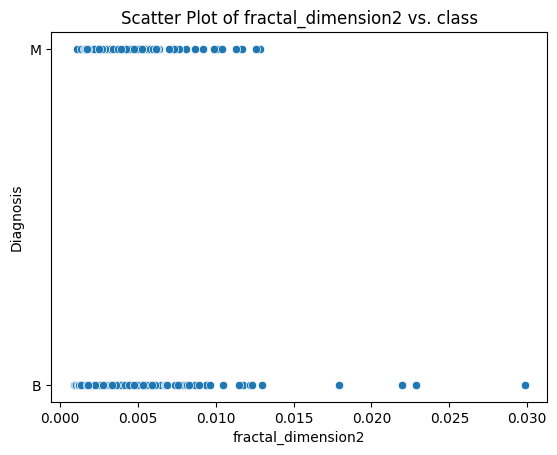

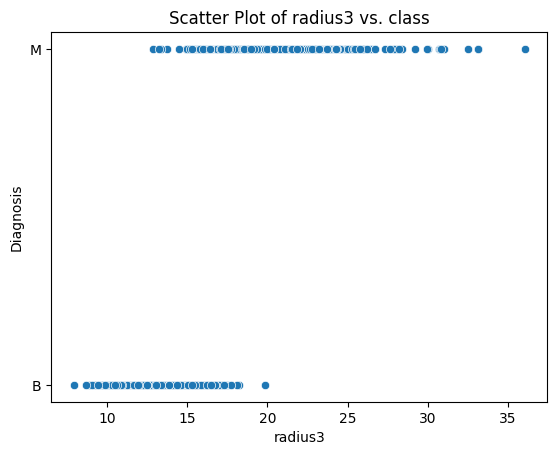

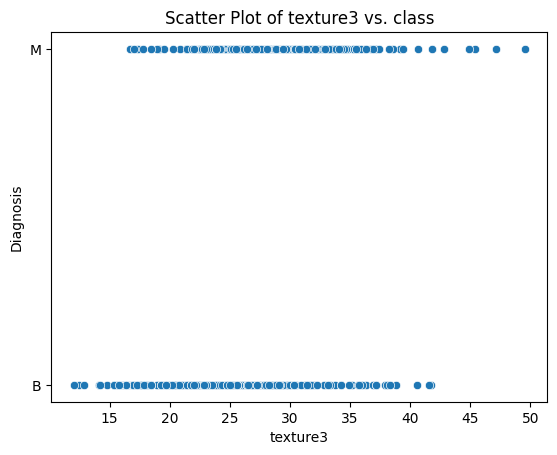

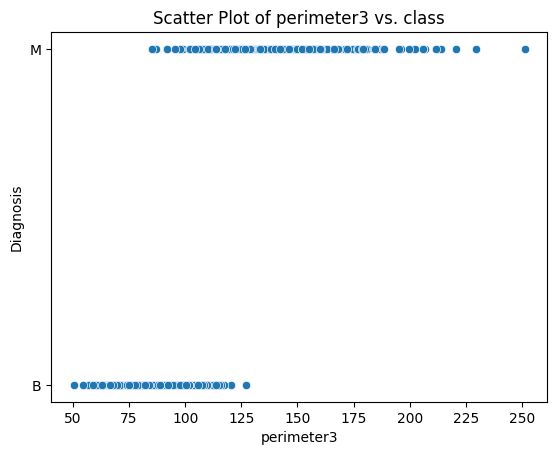

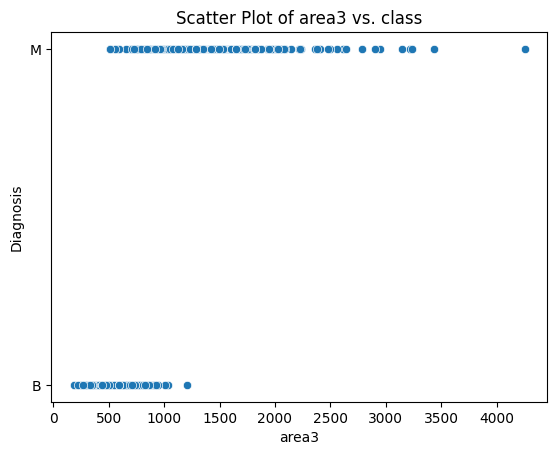

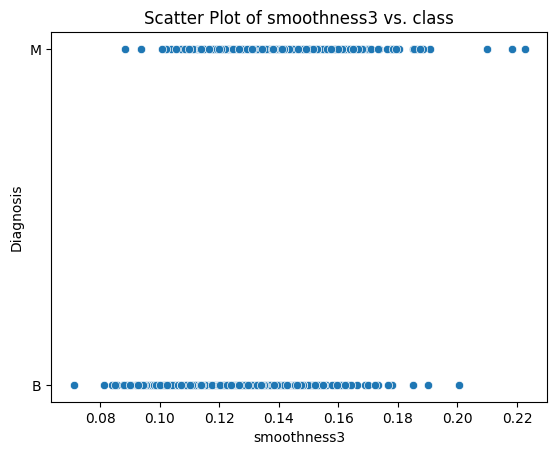

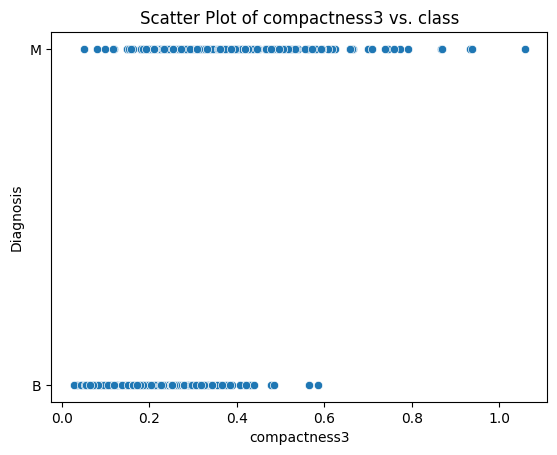

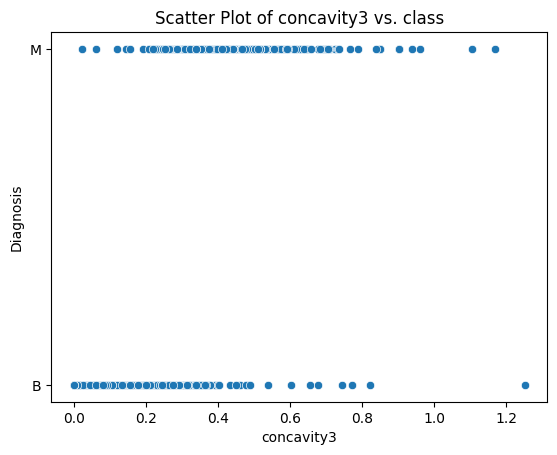

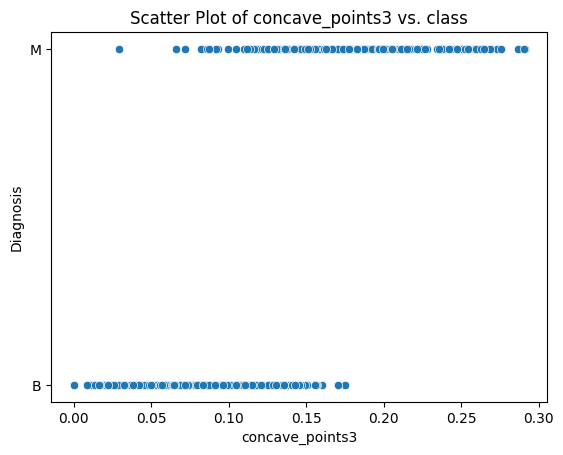

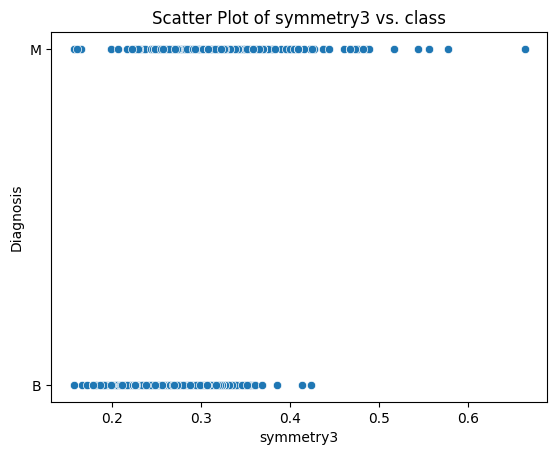

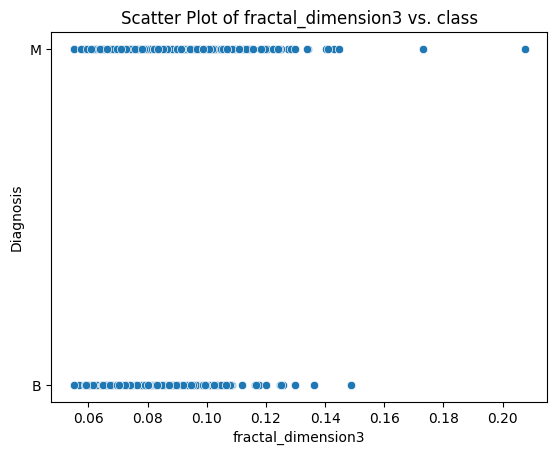

In [9]:
# d. Bivariate Analysis
print("Bivariate Analysis:")
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    plt.figure()
    sns.scatterplot(x=column, y=target, data=data) # changed to 'class'
    plt.title(f"Scatter Plot of {column} vs. class")  # changed to 'class'
    plt.xlabel(column)
    plt.ylabel(target)  # changed to 'class'
    plt.show()

In [12]:
# e. Multivariate Analysis
print("Multivariate Analysis (Pair Plot):")
numeric_data_for_pairplot = data.select_dtypes(include=[float, int])
sns.pairplot(pd.concat([numeric_data_for_pairplot, data[y.columns.to_list()[0]]], axis=1))  # changed to 'class'
plt.show()
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# f. Outlier Detection
print("Outlier Detection (Box Plots):")
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    plt.figure()
    sns.boxplot(y=data[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

In [ ]:
# g. Missing Value Analysis
print("Missing Value Analysis:")
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:
# i. Class Imbalance
print("Class Imbalance:")
print(data[target].value_counts()) # changed to 'class'
plt.figure()
sns.countplot(x=target, data=data) # changed to 'class'
plt.title("Class Distribution") # changed to 'class'
plt.xlabel("class") # changed to 'class'
plt.ylabel("Count")
plt.show()

In [ ]:
# j. Data Transformation
print("Data Transformation (Log Transformation of skewed feature):")
transform_data = data.copy()
for column in transform_data.columns:
  if pd.api.types.is_numeric_dtype(transform_data[column]) and skew(transform_data[column]) > 1:  # Example: Log transform right-skewed data
    transform_data[column + '_log'] = np.log1p(transform_data[column])  #log1p to handle 0 values
    plt.figure()
    sns.histplot(transform_data[column + '_log'], kde=True)
    plt.title(f"Log Transformed Histogram of {column}")
    plt.xlabel(column + '_log')
    plt.ylabel("Frequency")
    plt.show()